# Отчет по лабораторной №2
## по курсу "Системы аналитических вычислений"

### группа: М8О-207Б-19
### студент: Бирюков В. В.

## Задание 1

**Вариант A: дихотомия и метод Ньютона.**

In [1]:
def dichotomy(f, a, b, steps, draw_plots=false):
    dstep = steps / 5;
    plots = list()
    xmin, xmax = a, b
    
    for i in range(steps):        
        c = (a + b) / 2
        if f(a) * f(c) > 0:
            a = c
        elif f(b) * f(c) > 0:
            b = c
            
        if draw_plots and ((i+1) / dstep).trunc() >= (len(plots)):
            plots.append(plot(f, (xmin, xmax), title=r"$step = {},\ x = {},\ f(x) = {}$".format(i+1, c.n(digits=5), f(c).n(digits=5))) + 
                         point((c, f(c)), color="red", size=20, zorder=3))
    if draw_plots:
        graphics_array(plots, ncols=3, nrows=2).show(figsize=[9,6])
    
    return c

def newton(f, a, b, steps, draw_plots=false):
    dstep = steps / 5;
    plots = list()
    xmin, xmax = a, b
    
    df = f.diff()
    x1 = a
    x2 = (a + b) / 2
    for i in range(steps):
        x1 = x2
        x2 = x1 - f(x1) / df(x1)
        
        if draw_plots and ((i+1) / dstep).trunc() >= len(plots):
            plots.append(plot(f, (xmin, xmax), title="$step = {}, x = {}, f(x) = {}$".format(i+1, x2.n(digits=5), f(x2).n(digits=5))) + 
                         plot(df(x2)*(x - x2) + f(x2), (xmin, xmax), color="red") + 
                         point((x2, f(x2)), color="red", size=20, zorder=3))
    if draw_plots:
        graphics_array(plots, ncols=3, nrows=2).show(figsize=[9,6])
    
    return x2

In [2]:
p(x) = x^3 - 9*x^2 + 23*x - 15

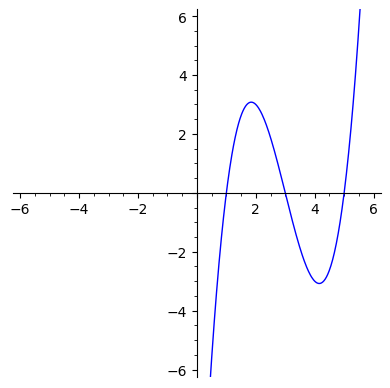

In [3]:
plot(p, xmin=-6, xmax=6, ymin=-6, ymax=6, aspect_ratio=1).show()

In [4]:
# Интервалы для корней
roots_intervals = [(0.4, 2.7), (2, 4.9), (3.8, 5.5)]
max_steps = 20

In [5]:
@interact(steps=(1, max_steps, 1), root=range(len(roots_intervals)))
def _(steps=6, root=0):
    dichotomy(p, roots_intervals[root][0], roots_intervals[root][1], steps, true)

Interactive function <function _ at 0x6ffeaafd35f0> with 2 widgets
  steps: IntSlider(value=6, description='st…

In [6]:
@interact(steps=(1, max_steps, 1), root=range(len(roots_intervals)))
def _(steps=6, root=0):
    newton(p, roots_intervals[root][0], roots_intervals[root][1], steps, true)

Interactive function <function _ at 0x6ffeaadcfc20> with 2 widgets
  steps: IntSlider(value=6, description='st…

In [7]:
# Аналитические корни
sols = solve(p==0, x)
for i, sol in enumerate(sols):
    show(LatexExpr("x_{} = {}".format(i, sol.rhs().n(digits=3))))

x_0 = 1.00

x_1 = 5.00

x_2 = 3.00

In [8]:
show("Метод дихотомии:")
for i, (a, b) in enumerate(roots_intervals):
    show(LatexExpr(r"\ x_{} = {}".format(i, dichotomy(p, a, b, max_steps).n(digits=5))))
    
show("Метод Ньютона:")
for i, (a, b) in enumerate(roots_intervals):
    show(LatexExpr(r"\ x_{} = {}".format(i, newton(p, a, b, max_steps).n(digits=5))))

'Метод дихотомии:'

\ x_0 = 1.0000

\ x_1 = 3.0000

\ x_2 = 5.0000

'Метод Ньютона:'

\ x_0 = 1.0000

\ x_1 = 3.0000

\ x_2 = 5.0000

## Задание 2

**Вариант 1**

In [9]:
def ext_gcd(a, b):
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        c = a % b
        q = (a - c) / b
        a, b = b, c
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    return (x, y, a)

In [10]:
R.<x> = QQ["x"]

In [11]:
f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1
g = x^5 - x^4 - x^3 + x^2 + 5*x - 5

In [12]:
u, v, h = ext_gcd(f, g)

show(LatexExpr("gcd(f, g) = "), gcd(f, g))
show(LatexExpr(r"ext\_gcd(f, g) = "), h)
show(LatexExpr("u(x) = "), u)
show(LatexExpr("v(x) = "), v)
show(LatexExpr(r"(f*u + g*v = h) \equiv "), f*u + g*v == h)
show(LatexExpr(r"({})*({}) + ({})({}) = {}".format(*(latex(i) for i in (f, u, g, v, h)))))

gcd(f, g) =  x - 1

ext\_gcd(f, g) =  1936/441*x - 1936/441

u(x) =  -16/21*x^3 - 128/441*x^2 + 656/441*x + 1264/441

v(x) =  16/21*x^2 - 880/441*x + 640/441

(f*u + g*v = h) \equiv  True

(x^{4} - 4 x^{3} + 7 x^{2} - 5 x + 1)*(-\frac{16}{21} x^{3} - \frac{128}{441} x^{2} + \frac{656}{441} x + \frac{1264}{441}) + (x^{5} - x^{4} - x^{3} + x^{2} + 5 x - 5)(\frac{16}{21} x^{2} - \frac{880}{441} x + \frac{640}{441}) = \frac{1936}{441} x - \frac{1936}{441}

## Задание 3

**Вариант 1**

In [2]:
u(x, y, z) = 7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7

In [3]:
A = matrix([
    [7, 4, 4],
    [4, 3, 3],
    [4, 3, 3]   
])
B = vector([3, 0.5, 0])
a0 = 7

show(LatexExpr("A = "), A)
show(LatexExpr("B = "), B.n(digits=5))
show(LatexExpr("a_0 = "), a0)

A =  [7 4 4]
[4 3 3]
[4 3 3]

B =  (3.0000, 0.50000, 0.00000)

a_0 =  7

In [12]:
# Характеристический многочлен
var('l', latex_name=r"\lambda")
char_poly = (A - matrix.identity(3) * l).det().simplify_full()
show(LatexExpr(r"|A - \lambda * E| = "), char_poly)

x^3 - 13*x^2 + 10*x

In [16]:
# Собственные значения
eigen_values = [i.rhs() for i in solve(char_poly == 0, l)]
eigen_values.sort()
for i, ev in enumerate(eigen_values, 1):
    show(LatexExpr(r"\lambda_{} = {}".format(i, ev.n(digits=5))))

\lambda_1 = 0.00000

\lambda_2 = 0.82109

\lambda_3 = 12.179

In [17]:
# Собственные векторы
eigen_vectors = list()
for i, ev in enumerate(eigen_values, 1):
    evect = vector(RR, *(A - matrix.identity(3) * ev).right_kernel().basis())
    eigen_vectors.append(evect)
    show(LatexExpr(r"s_{} = {}".format(i, evect.n(digits=5))))

s_1 = (0.00000, 1.0000, -1.0000)

s_2 = (1.0000, -0.77236, -0.77236)

s_3 = (1.0000, 0.64736, 0.64736)

In [18]:
# Проверка собственных значений и векторов
for i, (ev, [evect], _) in enumerate(A.eigenvectors_right()):
    show(LatexExpr(r"\lambda_{0} = {1}; s_{0} = {2}".format(i, ev.n(digits=5), evect.n(digits=5))))

\lambda_0 = 0.00000; s_0 = (0.00000, 1.0000, -1.0000)

\lambda_1 = 0.82109; s_1 = (1.0000, -0.77236, -0.77236)

\lambda_2 = 12.179; s_2 = (1.0000, 0.64736, 0.64736)

In [19]:
# Матрица перехода из нормированых собственных векторов
S = list()
for ev in eigen_vectors:
    S.append(ev / sqrt(ev * ev))
S = matrix(S).T
show(LatexExpr("S = "), S.n(digits=5))

S =  [ 0.00000  0.67526  0.73758]
[ 0.70711 -0.52155  0.47748]
[-0.70711 -0.52155  0.47748]

In [20]:
# Диагональная матрица
A1 = S.T * A * S
show(LatexExpr(r"\Lambda = S^T * A * S = "), A1.n(digits=5))

\Lambda = S^T * A * S =  [   0.00000    0.00000    0.00000]
[   0.00000    0.82109 3.8858e-16]
[   0.00000 8.8818e-16     12.179]

In [21]:
# Преобразование коэффициентов линейной формы
B1 = S.T * B
show(LatexExpr("B' = S^T * B = "), B1.n(digits=5))

B' = S^T * B =  (0.35355, 1.7650, 2.4515)

In [22]:
# Почти приведенное уравнение
v = a0
variables = [x, y, z]
for i in range(len(variables)):
    v += A1[i][i] * variables[i] ^ 2 + 2 * B1[i] * variables[i]
show(v == 0)

0.821091654199727*y^2 + 12.1789083458003*z^2 + 0.707106781186547*x + 3.53001916296626*y + 4.90295469172324*z + 7 == 0

In [23]:
# Приведенное уравнение
v = 0
a1 = a0

# Убираем линейные члены, приводя к полному квадрату, где это возможно
for i in range(len(variables)):
    if A1[i][i] != 0:
        v += A1[i][i] * (variables[i] + B1[i] / A1[i][i]) ^ 2
        a1 -= B1[i] ^ 2 / A1[i][i]
    else:
        v += 2 * B1[i] * variables[i]

v = (v + a1) / a1
show(v == 0)

0.302706600626627*(y + 2.14958899223423)^2 + 4.48992012748397*(z + 0.201288758914667)^2 + 0.260684527626377*x + 1.00000000000000 == 0

In [24]:
# Исходный график
implicit_plot3d(u, (x, -10, 10), (y, -20, 20), (z, -20, 20), plot_points=100)

Graphics3d Object

In [25]:
# График канонического уравнения
implicit_plot3d(v, (x, -20, 0), (y, -10, 10), (z, -10, 10), plot_points=100)

Graphics3d Object